# Notebook 10 — Unsupervised Learning (Solutions)

Here we solve the clustering and dimensionality reduction exercises step by step.

## Exercise 1 — k-Means Clustering

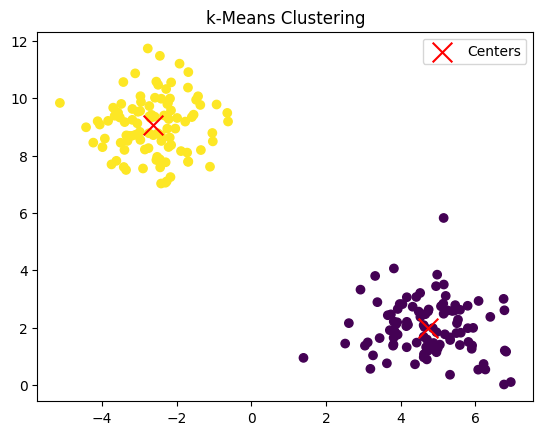

Cluster Centers:
 [[ 4.73782734  1.99498752]
 [-2.62179752  9.05060666]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset with 2 clusters
X, _ = make_blobs(n_samples=200, centers=2, random_state=42)

# Fit k-means
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x', s=200, label='Centers')
plt.legend()
plt.title('k-Means Clustering')
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)

✅ **Explanation:** k-means partitions the dataset into 2 clusters, minimizing within-cluster variance. The red X markers are the computed centroids.

## Exercise 2 — Hierarchical Clustering

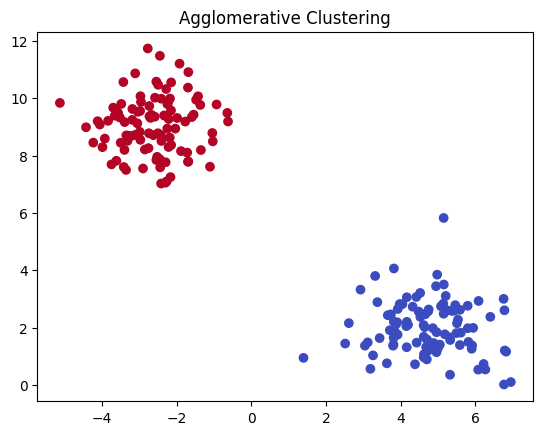

In [2]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=2)
y_hc = hc.fit_predict(X)

# Plot results
plt.scatter(X[:,0], X[:,1], c=y_hc, cmap='coolwarm')
plt.title('Agglomerative Clustering')
plt.show()

✅ **Explanation:** Agglomerative clustering builds a tree (dendrogram) by successively merging clusters. Unlike k-means, it doesn’t assume spherical clusters.

## Exercise 3 — Principal Component Analysis (PCA)

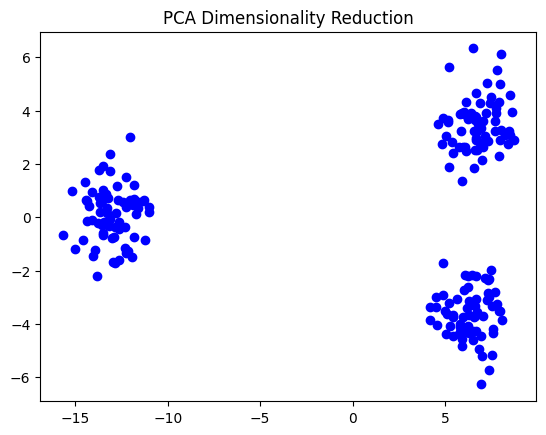

Explained Variance Ratio: [0.8929021  0.09665555]


In [3]:
from sklearn.decomposition import PCA

# Generate 3D dataset
X3, _ = make_blobs(n_samples=200, centers=3, n_features=3, random_state=42)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X2 = pca.fit_transform(X3)

# Plot reduced data
plt.scatter(X2[:,0], X2[:,1], c='blue')
plt.title('PCA Dimensionality Reduction')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

✅ **Explanation:** PCA projects data into a lower-dimensional subspace that maximizes variance. The explained variance ratio tells us how much information is preserved.

## Exercise 4 — t-SNE for Dimensionality Reduction

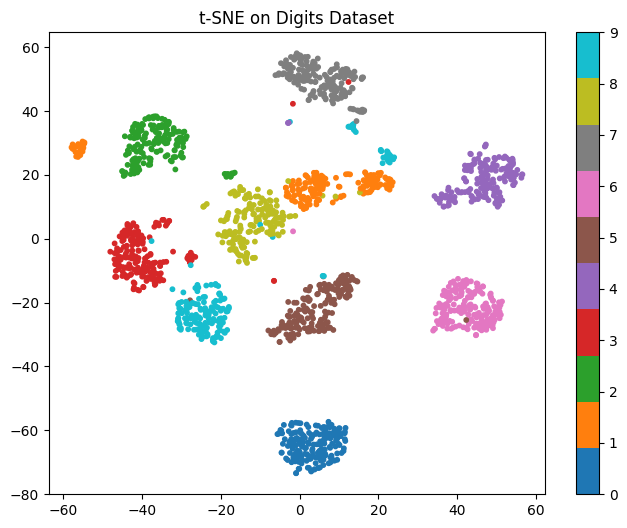

In [4]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load dataset
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Apply t-SNE (warning: can take ~30s)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_digits)

# Plot 2D embedding
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_digits, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE on Digits Dataset')
plt.show()

✅ **Explanation:** t-SNE preserves local structure and is great for visualizing high-dimensional data (like images) in 2D. Here digits with similar structure group together.